# MODS205 - Digital Finance - Project

### Leonardo Hannas de Carvalho Santos
### Vinícius Barros Alvarenga

---
## Question 1
**Comment on the article “Crypto’s Richest Rebel” from Fortune April/May 2022 available on the e-campus website using all keywords and concepts covered in the course.**

---
## Question 2
**Comment on the article “Binance CEO Changpeng Zhao charged with money laundering” from Fortune Website 2023-11-23 available on the e-campus website using all keywords and concepts covered in the course.**

---
## Question 3

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Question 3.1
**Import data in Excel (2 stocks, CAC40 index, 5-week interest rate from the US Treasury). Sort data by date and make sure that all dates coincides for all columns. Adjust cells if there are missing values.**

In [2]:
# Data for the 2 stocks
air_liquide_stock = pd.read_csv('AI.PA.csv')
peugeot_stock = pd.read_csv('UG.PA.csv')

# Data for the CAC40 index
CAC40 = pd.read_csv('^FCHI.csv')

# Data for 5-week interest rate from the US Treasury
interest_rate = pd.read_csv('^IRX.csv')

# List of the dataframes
df_list = [air_liquide_stock, peugeot_stock, CAC40, interest_rate]

In [3]:
# Function to replace the null (nan) values of the datavrframes with the mean of the column
def replace_nan_with_mean(df_list):
    updated_dfs = []
    for df in df_list:
        for col in df.columns:
            if df[col].isnull().any():
                df[col].fillna(df[col].mean(), inplace=True)
        updated_dfs.append(df)
    return updated_dfs

updated_list = replace_nan_with_mean(df_list)

In [4]:
# Check if the dataframes had null values and have been updated
if updated_list == df_list:
    print("The dataframes didn't have null values")
else:
    print("The dataframes had null values and have been updated")

The dataframes didn't have null values


In [5]:
# Dimensions of the dataframes
print(f"Air liquid stock shape = {air_liquide_stock.shape}")
print(f"Peugeot stock shape = {peugeot_stock.shape}")
print(f"CAC40 shape = {CAC40.shape}")
print(f"Interest rate shape = {interest_rate.shape}")

Air liquid stock shape = (255, 7)
Peugeot stock shape = (255, 7)
CAC40 shape = (255, 7)
Interest rate shape = (252, 7)


In [6]:
# Function to convert the date column from string to datetime
def str_to_date(column_name, df_list):
    for df in df_list:
        df[column_name] = pd.to_datetime(df[column_name])
    return df_list

In [7]:
# Function to align the dataframes
def align_dataframes(df_list):
    # Create a set with all the dates present in all the dataframes
    dates = set.intersection(*(set(df['Date']) for df in df_list))

    # Criates a new list of dataframes, where each dataframe is filtered to contain only the dates present in all dataframes
    list_aligned_dfs = [df[df['Date'].isin(dates)].sort_values('Date').reset_index(drop=True) for df in df_list]

    # Verifies if all the dates are present in all the dataframes
    for data in dates:
        if not all(data in df['Date'].values for df in list_aligned_dfs):
            # If a date is not present in all dataframes, remove that date from all dataframes
            list_aligned_dfs = [df[df['Date'] != data] for df in list_aligned_dfs]

    return list_aligned_dfs

In [8]:
# Update the list of dataframes
updated_list = align_dataframes(str_to_date("Date",updated_list))
df_list = updated_list

# Update the dataframes
air_liquide_stock = df_list[0]
peugeot_stock = df_list[1]
CAC40 = df_list[2]
interest_rate = df_list[3]

### Question 3.2
**Give a short financial analysis of the two stocks by using relevant concepts of the course.**

Closing price trend of *Air Liquide* and *Peugeot* stocks:

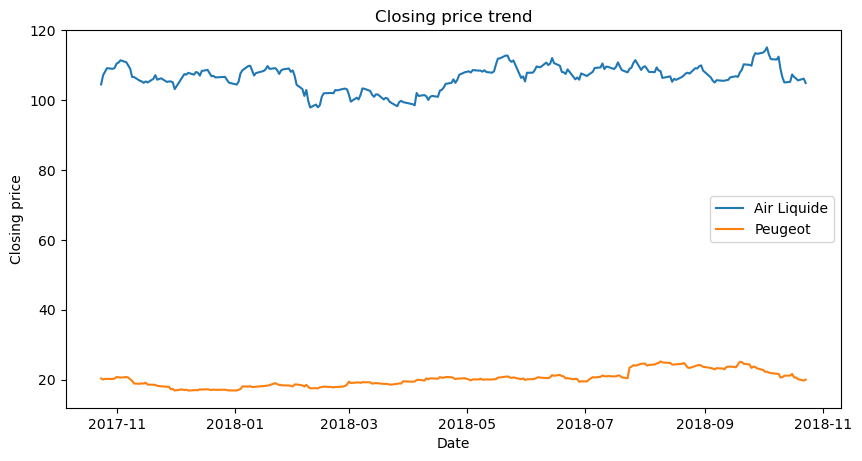

In [9]:
# Closing price trend
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(air_liquide_stock['Date'], air_liquide_stock['Close'], label='Air Liquide')
plt.plot(peugeot_stock['Date'], peugeot_stock['Close'], label='Peugeot')
plt.title('Closing price trend')
plt.xlabel('Date')
plt.ylabel('Closing price')
plt.legend()
plt.show()

Volatility analysis of *Air Liquide* and *Peugeot* stocks:

In [10]:
# Daily return trend
air_liquide_stock['Daily Return'] = air_liquide_stock['Close'].pct_change()
peugeot_stock['Daily Return'] = peugeot_stock['Close'].pct_change()
CAC40['Daily Return'] = CAC40['Close'].pct_change()

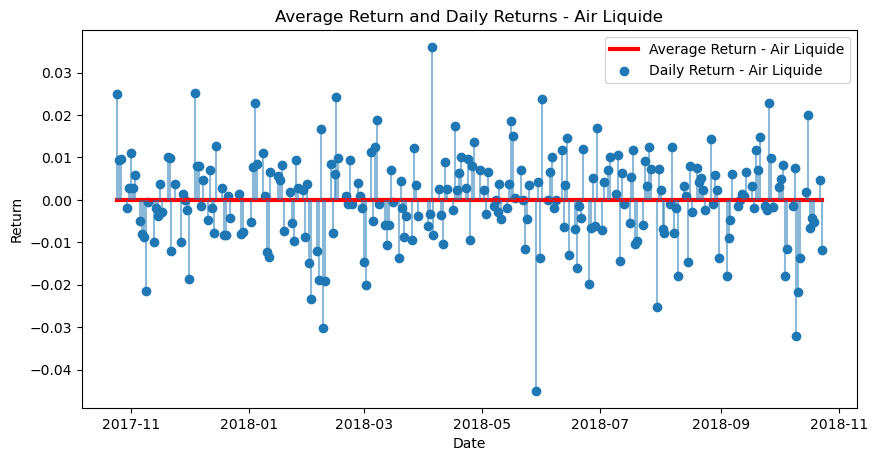

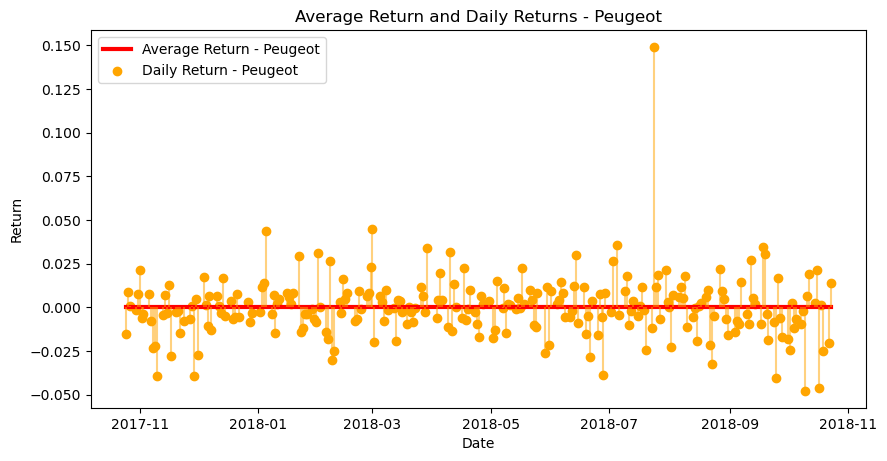

In [11]:
# Remove rows with missing 'Date' or 'Daily Return' in air_liquide_stock
air_liquide_stock = air_liquide_stock.dropna(subset=['Date', 'Daily Return'])

# Remove rows with missing 'Date' or 'Daily Return' in peugeot_stock
peugeot_stock = peugeot_stock.dropna(subset=['Date', 'Daily Return'])

# Plotting the average return line for Air Liquide
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(air_liquide_stock['Date'], [air_liquide_stock['Daily Return'].mean()] * len(air_liquide_stock), label='Average Return - Air Liquide', color='red', linewidth=3)
plt.scatter(air_liquide_stock['Date'], air_liquide_stock['Daily Return'], label='Daily Return - Air Liquide', marker='o')

# Connect each point with a perpendicular line to the average return line
for x, y in zip(air_liquide_stock['Date'], air_liquide_stock['Daily Return']):
    plt.vlines(x, air_liquide_stock['Daily Return'].mean(), y, alpha=0.5)

plt.title('Average Return and Daily Returns - Air Liquide')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()

# Plotting the average return line for Peugeot
plt.figure(figsize=(10, 5), dpi=100)
plt.plot(peugeot_stock['Date'], [peugeot_stock['Daily Return'][1:].mean()] * len(peugeot_stock), label='Average Return - Peugeot', color='red', linewidth=3)
plt.scatter(peugeot_stock['Date'], peugeot_stock['Daily Return'], label='Daily Return - Peugeot', marker='o', color='orange')

# Connect each point with a perpendicular line to the average return line
for x, y in zip(peugeot_stock['Date'], peugeot_stock['Daily Return']):
    plt.vlines(x, peugeot_stock['Daily Return'].mean(), y, colors='orange', alpha=0.5)
    
plt.title('Average Return and Daily Returns - Peugeot')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.show()

In [12]:
# Standard deviation of the daily returns
airliquide_std = air_liquide_stock['Daily Return'].std()
peugeot_std = peugeot_stock['Daily Return'].std()

# Standard deviation dataframe
std_df = pd.DataFrame({'Stock': ['Air Liquide', 'Peugeot'], 'Daily Return Standard Deviation': [airliquide_std, peugeot_std]})
std_df = std_df.set_index('Stock', drop=True)

std_df

,Daily Return Standard Deviation
Stock,
Air Liquide,0.010580
Peugeot,0.017747


From the dataframe above we can see that the volatility of *Air Liquide* stock is higher than the volatility of *Peugeot* stock.

### Question 3.3
**Compute the return for both stocks and for the CAC40 index. Comment on your results.**

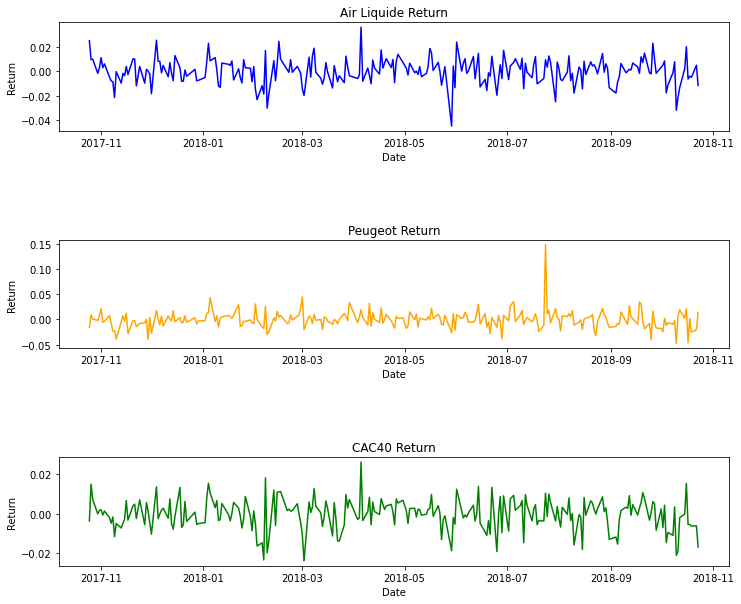

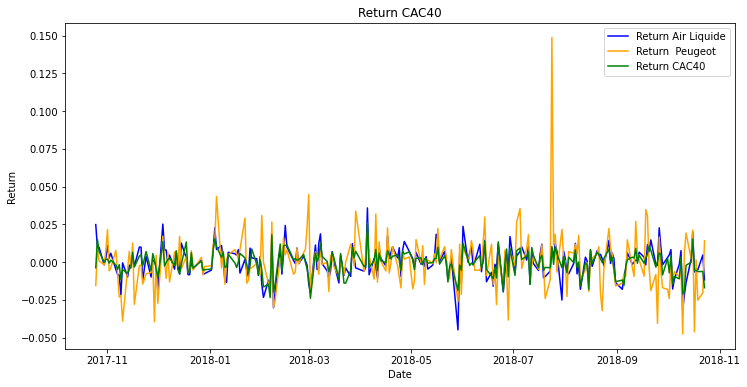

In [13]:
# We computed the returns in the question 3.2

def plot_return(ax, x_axis_data, y_axis_data ,title, color):
    out = ax.plot(x_axis_data, y_axis_data, label=title, color=color)
    ax.set_title(title)
    ax.set_xlabel('Date')
    ax.set_ylabel('Return')
    return out

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))
fig.subplots_adjust(hspace=1)
plot_return(ax1, air_liquide_stock['Date'], air_liquide_stock['Daily Return'], 'Air Liquide Return', 'blue')
plot_return(ax2, peugeot_stock['Date'], peugeot_stock['Daily Return'], 'Peugeot Return', 'orange')
plot_return(ax3, CAC40['Date'], CAC40['Daily Return'], 'CAC40 Return', 'green')
    
    
fig, ax = plt.subplots(figsize=(12, 6))
plot_return(ax, air_liquide_stock['Date'], air_liquide_stock['Daily Return'], 'Return Air Liquide', "blue")
plot_return(ax, peugeot_stock['Date'], peugeot_stock['Daily Return'], 'Return  Peugeot', 'orange')
plot_return(ax, CAC40['Date'], CAC40['Daily Return'], 'Return CAC40', 'green')
ax.legend()
plt.show()



We can highlight some aspects of this chart. Firstly, all three lines are very close, with some trends occurring simultaneously in all of them, which might indicate a macro effect on all stocks and the index. For instance, around 2018-06, we observe a significant dip in all of the stocks and the index, which might have been caused by some factor affecting all of them. Additionally, we can clearly see that the curves overlap, indicating a similar behavior among them.
The most distinctive one is the Peugeot curve. In this case, we have the highest global peak, but also the most distinct local valleys and peaks for the series, suggesting that this stock might be more volatile than the others.

### Question 3.4
**Compute the coefficients of Kurtosis and of asymmetry of the 3 series of `Question 3.3`. Plot the histograms and comment on your results.**

Air Liquide kurtosis: 1.5436828227054535
Peugeot kurtosis: 19.479876263450755
CAC40 kurtosis: 0.7000638041951324

Air Liquide skew: -0.32333524527574187
Peugeot skew: 2.2741133050672624
CAC40 skew: -0.34798069388850855


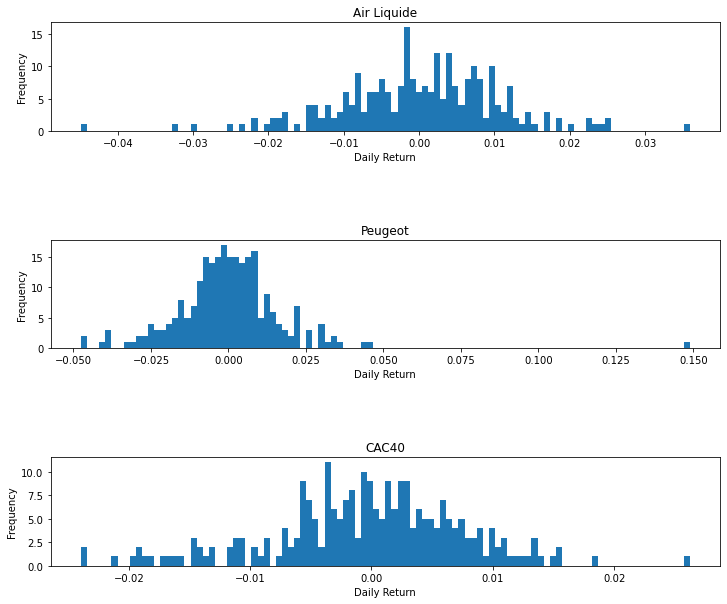

In [14]:
# Compute the Kurtosis of each serie:
airliquide_kurtosis = air_liquide_stock['Daily Return'].kurtosis()
peugeot_kurtosis = peugeot_stock['Daily Return'].kurtosis()
CAC40_kurtosis = CAC40['Daily Return'].kurtosis()

print(f'Air Liquide kurtosis: {airliquide_kurtosis}')
print(f'Peugeot kurtosis: {peugeot_kurtosis}')
print(f'CAC40 kurtosis: {CAC40_kurtosis}')
print('')

# Compute the asymmetry of each serie:
airliquide_skew = air_liquide_stock['Daily Return'].skew()
peugeot_skew = peugeot_stock['Daily Return'].skew()
CAC40_skew = CAC40['Daily Return'].skew()

print(f'Air Liquide skew: {airliquide_skew}')
print(f'Peugeot skew: {peugeot_skew}')
print(f'CAC40 skew: {CAC40_skew}')

# Plot the histograms of the daily returns
def plot_histogram(data, title, ax):
    ax.hist(data['Daily Return'], bins=100, label=title)
    ax.set_title(title)
    ax.set_xlabel('Daily Return')
    ax.set_ylabel('Frequency')

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))
fig.subplots_adjust(hspace=1)

plot_histogram(air_liquide_stock, 'Air Liquide', ax1)
plot_histogram(peugeot_stock, 'Peugeot', ax2)
plot_histogram(CAC40, 'CAC40', ax3)

plt.show()


When examining the kurtosis, it's evident that all of them exhibit a positive coefficient, indicating a leptokurtic curve characterized by higher peaks and heavier tails compared to the normal distribution. However, the Peugeot's coefficient stands out as the largest, suggesting that it adheres more closely to this pattern, a fact corroborated by the histograms.

Additionally, by analyzing the asymmetry, we can discern whether the distribution's tail inclines more towards the right (positive values) or the left (negative values), as demonstrated in the histograms.

## Question 3.5
**Compute the standard errors of the return for both stocks for the full period and then for 3 sub-periods of equal size. Is volatility constant?**

In [15]:
from scipy.stats import levene

# Compute the standard error of the full period (stardard deviation of the sample)

se_airliquide = air_liquide_stock['Daily Return'].std() / np.sqrt(len(air_liquide_stock['Daily Return']))
se_peugeot = peugeot_stock['Daily Return'].std() / np.sqrt(len(peugeot_stock['Daily Return']))

print(f'Air Liquide standard error: {se_airliquide}')
print(f'Peugeot standard error: {se_peugeot}\n')

# Divide the data into 3 subperiods of equal length
subperiods_airliquide = np.array_split(air_liquide_stock['Daily Return'], 3)
subperiods_peugeot = np.array_split(peugeot_stock['Daily Return'], 3)

# Compute the standard error of each subperiod
se_subperiods_airliquide = [subperiod.std() for subperiod in subperiods_airliquide]
se_subperiods_peugeot = [subperiod.std() for subperiod in subperiods_peugeot]

print("Standard Error of Subperiods:")
for i in range(3):
    print(f"Subperiod {i+1}:")
    print(f"    Air Liquide: {se_subperiods_airliquide[i]:.4f}")
    print(f"    Peugeot: {se_subperiods_peugeot[i]:.4f}")
    print()
    
# Levene test for the homogeneity of variances (volatility) of the 3 subperiods
statistic, p_value = levene(*subperiods_airliquide)

alpha = 0.01

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("The volatity are constant among the subperiods (reject the null hypothesis)")
else:
    print("The volatity is NOT constant among the subperiods (fail to reject the null hypothesis)")



Air Liquide standard error: 0.0006718119820775511
Peugeot standard error: 0.0011269503374705051

Standard Error of Subperiods:
Subperiod 1:
    Air Liquide: 0.0107
    Peugeot: 0.0143

Subperiod 2:
    Air Liquide: 0.0110
    Peugeot: 0.0133

Subperiod 3:
    Air Liquide: 0.0101
    Peugeot: 0.0239

The volatity is NOT constant among the subperiods (fail to reject the null hypothesis)


## Question 3.6
**Compute the correlation between each stock and the CAC40. Comment on your results.**

In [16]:
# Correlation between each stock and the CAC40
airliquide_CAC40_corr = air_liquide_stock['Daily Return'].corr(CAC40['Daily Return'])
peugeot_CAC40_corr = peugeot_stock['Daily Return'].corr(CAC40['Daily Return'])

# Pearson correlation between each stock and the CAC40
airliquide_CAC40_corr_pearson = air_liquide_stock['Daily Return'].corr(CAC40['Daily Return'], method='pearson')
peugeot_CAC40_corr_pearson = peugeot_stock['Daily Return'].corr(CAC40['Daily Return'], method='pearson')

if airliquide_CAC40_corr_pearson > 0.5:
    print(f"The Pearson correlation between Air Liquide and CAC40 is {airliquide_CAC40_corr_pearson}, which indicates a strong positive correlation")
elif airliquide_CAC40_corr_pearson < -0.5:
    print(f"The Pearson correlation between Air Liquide and CAC40 is {airliquide_CAC40_corr_pearson}, which indicates a strong negative correlation")
else:
    print(f"The Pearson correlation between Air Liquide and CAC40 is {airliquide_CAC40_corr_pearson}, which indicates a weak correlation")

if peugeot_CAC40_corr_pearson > 0.5:
    print(f"The Pearson correlation between Peugeot and CAC40 is {peugeot_CAC40_corr_pearson}, which indicates a strong positive correlation")
elif peugeot_CAC40_corr_pearson < -0.5:
    print(f"The Pearson correlation between Peugeot and CAC40 is {peugeot_CAC40_corr_pearson}, which indicates a strong negative correlation")
else:
    print(f"The Pearson correlation between Peugeot and CAC40 is {peugeot_CAC40_corr_pearson}, which indicates a weak correlation")

The Pearson correlation between Air Liquide and CAC40 is 0.8190382535877568, which indicates a strong positive correlation
The Pearson correlation between Peugeot and CAC40 is 0.47110156112767565, which indicates a weak correlation


The analysis of the correlation between the daily returns of Air Liquide's shares and the CAC40 index reveals a strong positive correlation, with a Pearson coefficient of approximately $0.82$. This indicates that, historically, Air Liquide's shares tend to move in a similar direction to the CAC40 index. This high level of correlation may suggest that Air Liquide, as one of the components of the index, has a significant impact on it or vice versa, and that the macroeconomic or market factors influencing the CAC40 also have a similar impact on Air Liquide. For investors, this could mean that investing in Air Liquide might be a way to gain exposure to the general trends of the French market, given its alignment with the movements of the CAC40 index.

On the other hand, the correlation between the daily returns of Peugeot's shares and the CAC40 index is lower, with a Pearson coefficient of approximately $0.47$. Although positive, this correlation indicates a less direct relationship between the movements of Peugeot's stock prices and the CAC40 index. This may suggest that, while Peugeot is influenced by the general economic conditions affecting the French market, there are specific factors related to the automotive sector or the company itself that may influence its performance more significantly than the broader market trends. For investors, this might indicate that Peugeot offers diversification opportunities within a portfolio seeking both exposure to general market trends and specific sectors with potentially different dynamics from the index as a whole.

## Question 3.7
**Compute the returns of a portfolio in which both stocks have an equal weight. Compute the average return and the standard deviation over the whole sample period. Comment on your results.**

In [17]:
average_return_peugeot = peugeot_stock['Daily Return'].mean()
std_peugeot = peugeot_stock['Daily Return'].std()
average_return_airliquide = air_liquide_stock['Daily Return'].mean()
std_airliquide = air_liquide_stock['Daily Return'].std()

print(f"The average return of Air Liquide is {average_return_airliquide:.6f}")
print(f"The standard deviation of Air Liquide is {std_airliquide:.4f}")
print(f"The average return of Peugeot is {average_return_peugeot:.6f}")
print(f"The standard deviation of Peugeot is {std_peugeot:.4f}\n")

# The return of the portfolio is the average of the returns of the two stocks
portfolio_return = (air_liquide_stock['Daily Return'] + peugeot_stock['Daily Return']) / 2

# The standard deviation and the average return of the portfolio 
average_return_portfolio = portfolio_return.mean()
std_portfolio = portfolio_return.std()

print(f"The average return of the portfolio is {average_return_portfolio:.6f}")
print(f"The standard deviation of the portfolio is {std_portfolio:.4f}")

The average return of Air Liquide is 0.000071
The standard deviation of Air Liquide is 0.0106
The average return of Peugeot is 0.000085
The standard deviation of Peugeot is 0.0177

The average return of the portfolio is 0.000078
The standard deviation of the portfolio is 0.0119


From the results we can see that when we mix both stocks in the portfolio we can minimize the risk, but also the return, compared to when we have only one stock. This can guide ones strategy to mix different stocks on a portfolio so it be less risky.

## Question 3.8
**Consider a portfolio with one stock and the risk-free interest rate (you can choose the stock out of the two that are available). What is the optimal portfolio allocation between these two assets for an investor with a utility function presented in the course and $A=1.5$?**

We will consider the stock Air Liquide and the risk-free interest rate. The optimal portfolio allocation $\omega^{\star}$ between two assets is obtained by solving the utility's maximization problem:

$$
\underset{\omega}{max}\ U = \omega \mathbb{E}(r_{A}) + (1-\omega) r_{f} - \frac{A}{2} \omega^2 \sigma_{A}^2,
$$

where:
* $\omega$ is the percentage allocated to the asset $A$;
* $r_{A}$ and $r_{f}$ are the daily returns associated to the asset $A$ and the risk-free interest rate, respectively;
* $A = 1.5$ is the risk aversion coefficient and $\sigma_{A}^2$ is the variance of the asset $A$.

To that, we solve the utility problem with the following equation:

$$
\frac{\partial U}{\partial \omega} = 0 \iff \mathbb{E}(r_{A}) - r_{f} - A \omega \sigma_{A}^2 = 0 \iff \omega^{\star} = \frac{\mathbb{E}(r_{A}) - r_{f}}{A \sigma_{A}^{2}}.
$$

We considered the asset $A$ to be the *Air Liquide* stock and the risk-free interest rate to be the 5-week interest rate from the US Treasury, taken from [this website](https://ycharts.com/indicators/5_year_treasury_rate).

In [18]:
A = 1.5
days_in_year = 252

# We chose the air Liquide stock to compose the portfolio
expected_return_airliquide = air_liquide_stock['Daily Return'].mean()
std_airliquide = air_liquide_stock['Daily Return'].std()

# anualize the return and the standard deviation (they are in the values of a day)
anual_return_airliquide =  (1+ expected_return_airliquide) ** days_in_year - 1
anual_std_airliquide = np.sqrt(days_in_year) * std_airliquide

# The risk-free rate is the 5-years interest rate from the US Treasury
rf = 4 / 100

w = (anual_return_airliquide - rf) / (A * anual_std_airliquide ** 2)

print(f"The weight of the Air Liquide stock in the portfolio is {w:.4f}")

The weight of the Air Liquide stock in the portfolio is -0.5171


## Question 3.9
**Consider the following 3 portfolios: portfolio 1 has stock 1 as the only component; portfolio 2 has stock 2 as the only component; portfolio 3 is the portfolio of `Question 3.7`. These are the only portfolio available to investors. Draw the efficient frontier. Which portfolio are inefficient?**

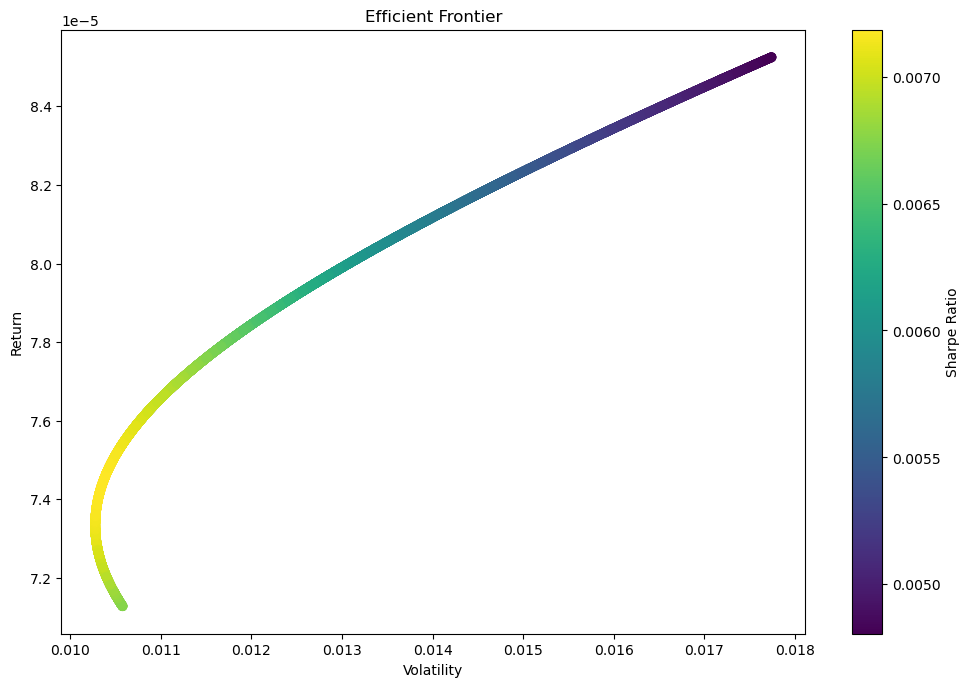

In [19]:
# Combine the daily returns into one DataFrame
df = pd.concat([air_liquide_stock['Daily Return'], peugeot_stock['Daily Return']], axis=1)
df.columns = ['Air Liquide', 'Peugeot']

# Drop any rows with missing values
df = df.dropna()

# Calculate the mean returns and the covariance matrix of returns
mean_returns = df.mean()
cov_matrix = df.cov()

# Define the number of portfolios to simulate
num_portfolios = 10000

# Initialize arrays to store the portfolio weights, returns and volatilities
weights_array = np.zeros((num_portfolios, len(df.columns)))
returns_array = np.zeros(num_portfolios)
volatility_array = np.zeros(num_portfolios)

# Simulate the portfolios
for i in range(num_portfolios):
    weights = np.random.random(len(df.columns))
    weights /= np.sum(weights)
    returns = np.dot(weights, mean_returns)
    volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    weights_array[i, :] = weights
    returns_array[i] = returns
    volatility_array[i] = volatility

# Plot the efficient frontier
plt.figure(figsize=(12, 8), dpi=100)
plt.scatter(volatility_array, returns_array, c=returns_array/volatility_array, marker='o')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.show()

## Question 3.10
**Consider the portfolio of `Question 3.7`. Compute the Sharpe ratio, the Sortino ratio, the Sterling ratio. Why are there differences between these ratios?**

In [23]:
# Average return of the portfolio
portfolio_return = (0.5 * air_liquide_stock['Daily Return']) + (0.5 * peugeot_stock['Daily Return'])
average_return_portfolio = portfolio_return.mean()

# Standard deviation of the portfolio
std_portfolio = portfolio_return.std()

# Setting the risk-free rate
risk_free_rate = 0.02

# Sharpe ratio
sharpe_ratio = (average_return_portfolio - risk_free_rate) / std_portfolio

# Sortino ratio
downside_returns = portfolio_return[portfolio_return < 0]
downside_std = downside_returns.std()
sortino_ratio = (average_return_portfolio - risk_free_rate) / downside_std

# Sterling ratio
sterling_ratio = average_return_portfolio / downside_std

# Dataframe with the ratios
ratios = {
    'Ratio': ['Sharpe ratio', 'Sortino ratio', 'Sterling ratio'],
    'Value': [sharpe_ratio, sortino_ratio, sterling_ratio]
}
ratios_df = pd.DataFrame(ratios)
ratios_df = ratios_df.reset_index(drop=True)

# Exhibiting the ratios
ratios_df

,Ratio,Value
0,Sharpe ratio,-1.675891
1,Sortino ratio,-2.591047
2,Sterling ratio,0.010179


The negative values for Sharpe and Sortino ratios indicate performance below the risk-free rate, suggesting the portfolio isn't adequately compensating for the risks taken. The small positive value of the Sterling Ratio shows the portfolio's average return is nearly at the level of its downside risk, which could be seen as unsatisfactory in terms of compensation for specific risks. These outcomes suggest a need to reassess investment choices or risk mitigation strategies.

## Question 3.11
**Compute the empirical VAR at $1\%$ for the same portfolio. Compute the 1st percentile of the normal distribution with mean and variance corresponding respectively to the empirical mean and to the empirical variance. Comment on your results.**

## Question 3.12
**Compute the VAR using resampling with 1000 observations. Compute the $1\%$ VAR on the simulated data set. Comment on your results.**

---
## Question 4

**Run an automated trading algorithm using any method you want (moving averages, candlesticks, patterns, ML, …) over the sample period. You can only have 3 positions: buy/sell, short/cover, do nothing. You cannot use derivative products. Can you beat the market?**